# Plots with ZFOURGE CDFS Data

In [2]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import gridspec
import matplotlib.pyplot as plt

from utils import white_viridis, scatter_colour_density

warnings.filterwarnings(category=RuntimeWarning, action='ignore', message='All-NaN slice encountered')

In [3]:
# Read in CDFS main data
data = pd.read_csv('DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(data)
df = df[df['Use'] == 1]

In [4]:
# Font settings
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Cambria']
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Cambria'
plt.rcParams['mathtext.it'] = 'Cambria:italic'
plt.rcParams['mathtext.bf'] = 'Cambria:bold'
plt.rcParams['axes.formatter.use_mathtext'] = True
# plt.rcParams['text.usetex'] = True

# SFR vs Mass

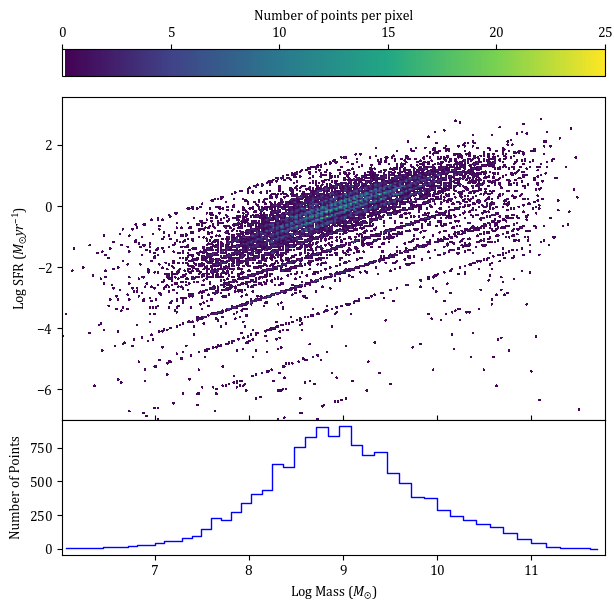

In [5]:
mass = df['lmass']
sfr = df['lsfr']

# Define bins for the bar graph
x_bins = np.logspace(np.log10(min(mass)), np.log10(max(mass)), 50)
counts, _ = np.histogram(mass, bins=x_bins)
x_centers = np.sqrt(x_bins[:-1] * x_bins[1:])

# Create a grid layout with 2 rows and 1 column
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
gs.update(hspace=0.0)  # Set the vertical gap between subplots to 0

# Log-log Scatter plot
ax0 = plt.subplot(gs[0], projection='scatter_density')
density = ax0.scatter_density(mass, sfr, cmap=white_viridis)
plt.colorbar(density, label='Number of points per pixel', location='top')
ax0.set_ylabel('Log SFR ($M_{☉} yr^{-1}$)')
ax0.set_ylim(-7) # xlim is never less than 6

# Bar graph
ax1 = plt.subplot(gs[1], sharex=ax0)
ax1.step(x_centers, counts, where='mid', color='b', linewidth=1)
ax1.set_xlabel('Log Mass ($M_{☉}$)')
ax1.set_ylabel('Number of Points')
ax1.get_xaxis().set_ticks_position('both')

C:\Users\n10480129\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


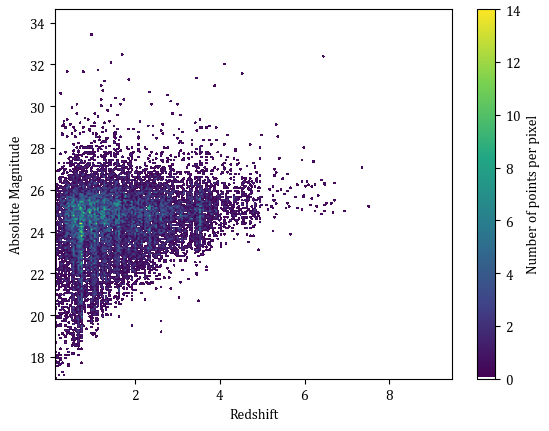

In [7]:
frest = df['FKs']
mabs = 25 - 2.5*np.log10(frest) # AB magnitude
z = df['z']

fig = plt.figure()
scatter_colour_density(fig, z, mabs, white_viridis)
plt.xlabel('Redshift')
plt.ylabel('Absolute Magnitude')
plt.show()

# Mass vs Redshift

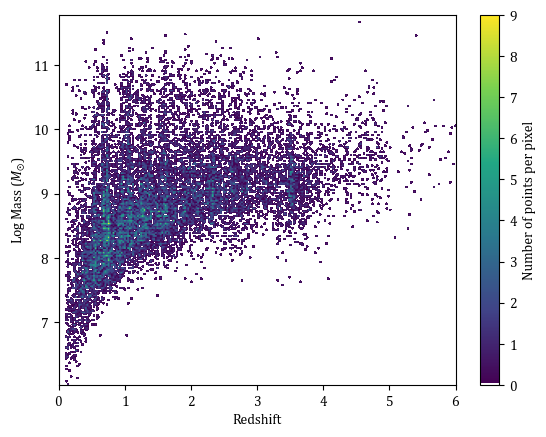

In [6]:
mass = df['lmass']
z = df['zpk']

fig = plt.figure()
scatter_colour_density(fig, z, mass, white_viridis)
plt.xlabel('Redshift')
plt.ylabel('Log Mass ($M_{☉}$)')
plt.xlim(0, 6)
plt.show()

# Ks vs Redshift

In [1]:
ks_vs_z = df[['FKs', 'zpk']]
ks_vs_z = ks_vs_z[ks_vs_z['FKs'] > 0]

ks = ks_vs_z['FKs']
z = ks_vs_z['zpk']

fig = plt.figure()
scatter_colour_density(fig, z, ks, white_viridis)
plt.xlabel('Redshift')
plt.ylabel('Ks')
# plt.yscale('log')
plt.show()

NameError: name 'df' is not defined

# U-V vs Mass

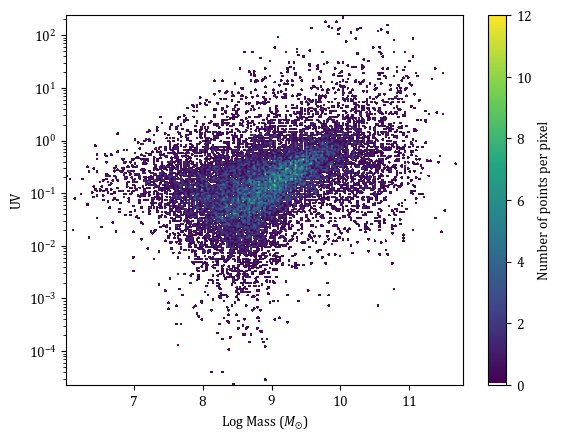

In [8]:
# uv = df['L2800']
U = df['FU']
V = df['FV']
mass = df['lmass']

fig = plt.figure()
scatter_colour_density(fig, mass, np.abs(U-V), white_viridis)
plt.xlabel('Log Mass ($M_{☉}$)')
plt.ylabel('UV')
plt.yscale('log')
# plt.ylim(0, 5)
plt.show()

# Luminosity vs Redshift

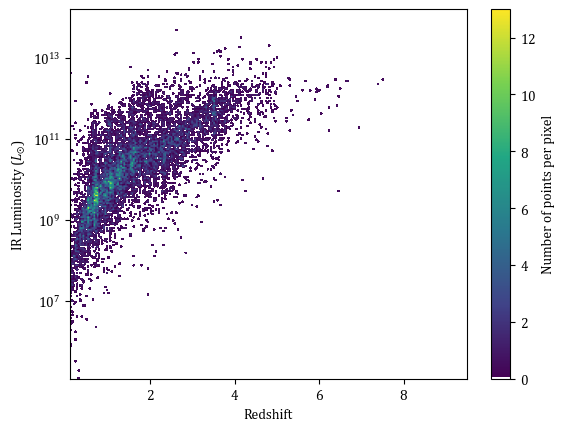

In [9]:
lir_vs_z = df[['LIR', 'zpk']]
lir_vs_z = lir_vs_z[lir_vs_z['LIR'] > 0]

lir = lir_vs_z['LIR']
z = lir_vs_z['zpk']

fig = plt.figure()
scatter_colour_density(fig, z, lir, white_viridis)
plt.xlabel('Redshift')
plt.ylabel('IR Luminosity ($L_{☉}$)')
plt.yscale('log')
plt.show()

# IR Luminosity vs SFR

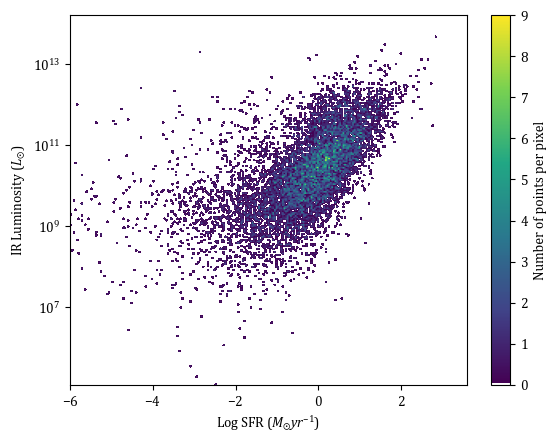

In [13]:
lir_vs_sfr = df[['lsfr', 'LIR']]
lir_vs_sfr = lir_vs_sfr[lir_vs_sfr['LIR'] > 0]

lir = lir_vs_sfr['LIR']
lsfr = lir_vs_sfr['lsfr']

fig = plt.figure()
scatter_colour_density(fig, lsfr, lir, white_viridis)
plt.xlabel('Log SFR ($M_{☉} yr^{-1}$)')
plt.ylabel('IR Luminosity ($L_{☉}$)')
plt.xlim(-6)
plt.yscale('log')
plt.show()

# IR Luminosity vs Mass

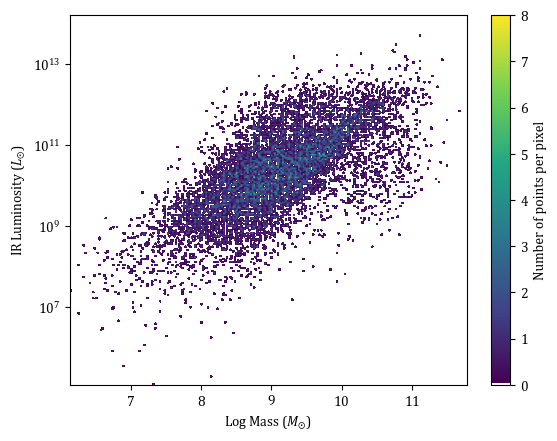

In [11]:
lir_vs_mass = df[['lmass', 'LIR']]
lir_vs_mass = lir_vs_mass[lir_vs_mass['LIR'] > 0]

lir = lir_vs_mass['LIR']
lmass = lir_vs_mass['lmass']

fig = plt.figure()
scatter_colour_density(fig, lmass, lir, white_viridis)
plt.xlabel('Log Mass ($M_{☉}$)')
plt.ylabel('IR Luminosity ($L_{☉}$)')
plt.yscale('log')
plt.show()

# Luminosity vs Radius

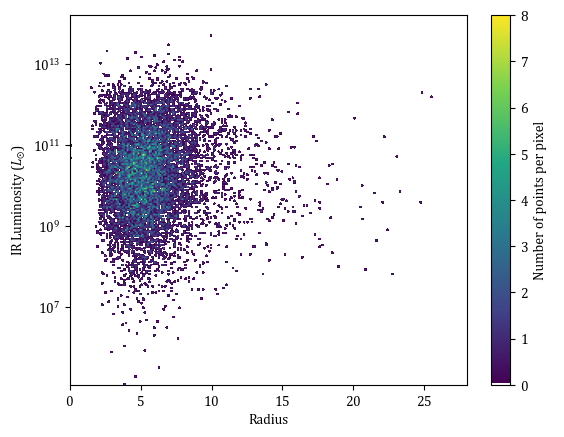

In [17]:
lir_vs_radius = df[['Rad', 'LIR']] # or R50
lir_vs_radius = lir_vs_radius[lir_vs_radius['LIR'] > 0]

lir = lir_vs_radius['LIR']
radius = lir_vs_radius['Rad']

fig = plt.figure()
scatter_colour_density(fig, radius, lir, white_viridis)
plt.xlabel('Radius')
plt.ylabel('IR Luminosity ($L_{☉}$)')
plt.yscale('log')
plt.show()

# RA vs DEC

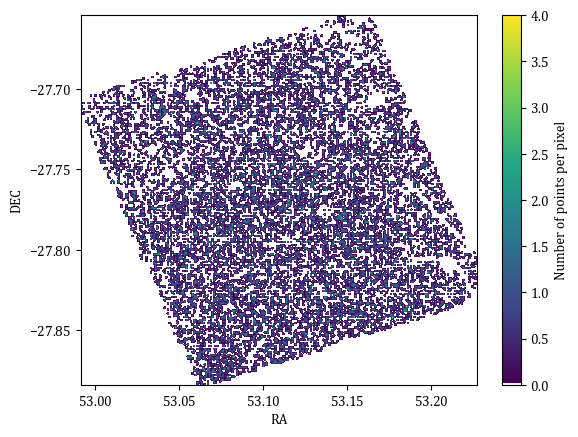

In [19]:
RA = df['_RAJ2000']
DEC = df['_DEJ2000']

fig = plt.figure()
scatter_colour_density(fig, RA, DEC, white_viridis)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

# U vs Ks

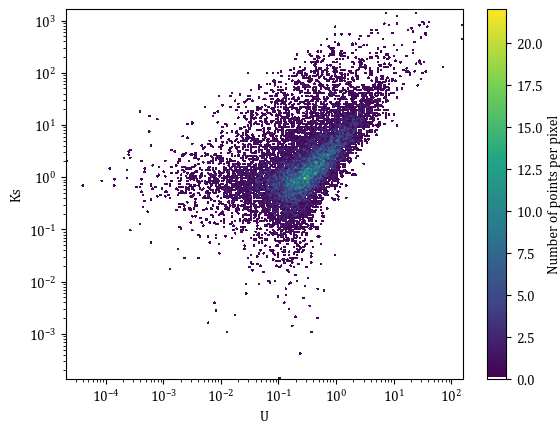

In [30]:
U_vs_ks = df[['FU', 'FKs']]
U_vs_ks = U_vs_ks[U_vs_ks['FKs'] > 0]
U_vs_ks = U_vs_ks[U_vs_ks['FU'] > 0]


U = U_vs_ks['FU']
ks = U_vs_ks['FKs']

fig = plt.figure()
scatter_colour_density(fig, U, ks, white_viridis)
plt.xlabel('U')
plt.ylabel('Ks')
plt.loglog()
plt.show()

# IR vs UV

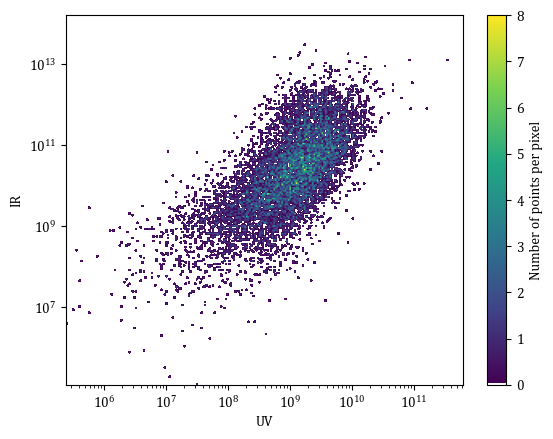

In [38]:
ir_vs_uv = df[['LIR', 'L2800']]
ir_vs_uv = ir_vs_uv[ir_vs_uv['L2800'] > 0]
ir_vs_uv = ir_vs_uv[ir_vs_uv['LIR'] > 0]

ir = ir_vs_uv['LIR']
uv = ir_vs_uv['L2800']

fig = plt.figure()
scatter_colour_density(fig, uv, ir, white_viridis)
plt.xlabel('UV')
plt.ylabel('IR')
plt.loglog()
plt.show()